#### importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

##### reading/importing the dataset and displaying its first 5 rows

In [2]:
df=pd.read_csv('./data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### getting shape and information about the dataset

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

##### getting the number of nan values in each column

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

##### removes columns with nan/null values (removes unnamed 32)

In [6]:

df=df.dropna(axis=1)

In [7]:
df.shape

(569, 32)

##### description of data in the dataframe

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df=df.drop(['id'],axis=1)

##### getting the number of cancerous (malignant:M) and non cancerous (benign:B) diagnosis in the dataset

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
enc=LabelEncoder()
df['diagnosis']=enc.fit_transform(df['diagnosis'])

##### finding correlation between all columns

<AxesSubplot: >

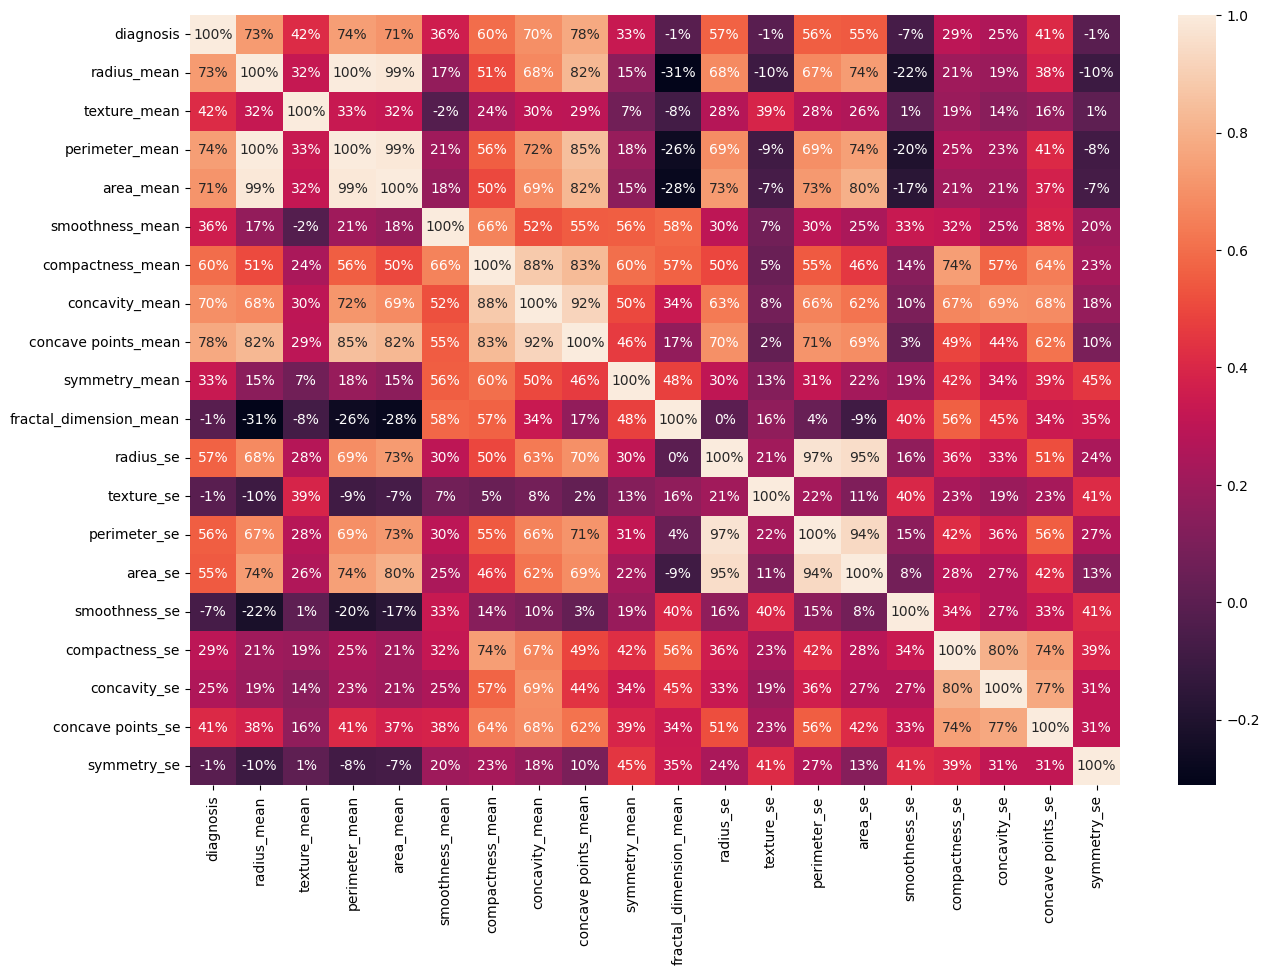

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,0:20].corr(),annot=True,fmt='.0%')

#### Visualizing the dataset

##### graph depicting relation between radius of cells and the area covered by them

<AxesSubplot: xlabel='radius_mean', ylabel='area_worst'>

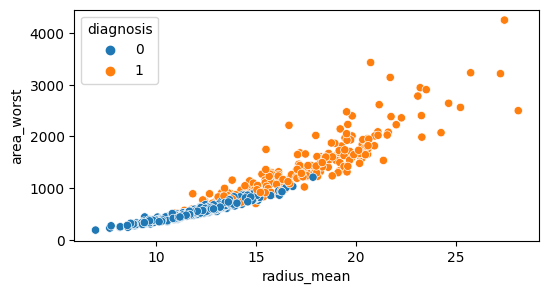

In [13]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x='radius_mean',y='area_worst',hue='diagnosis')

##### bar graph depicting number of benign (0) and malignant (1) cases in our dataset

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

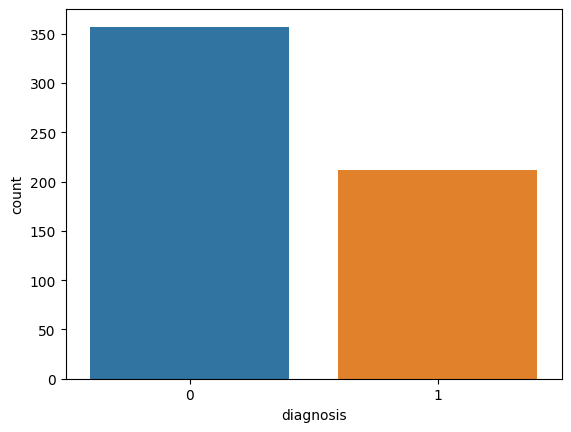

In [14]:
sns.countplot(x=df['diagnosis'])

##### the following plot shows that we need to normalise or perform feature scaling on the dataset

<AxesSubplot: xlabel='radius_mean', ylabel='Density'>

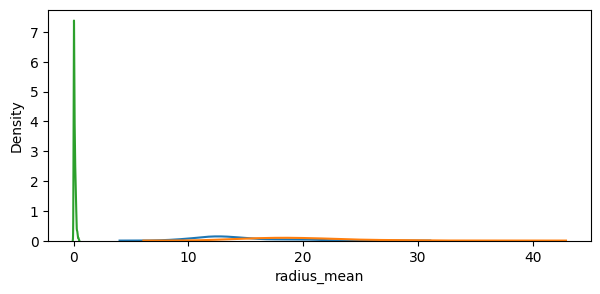

In [15]:
plt.figure(figsize=(7,3))
sns.kdeplot(df['radius_mean'])
sns.kdeplot(df['texture_mean'])
sns.kdeplot(df['concavity_mean'])

##### columns in our dataset

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

##### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaler_df=scale.fit_transform(df)
scaler_df=pd.DataFrame(scaler_df,columns=[ 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [18]:
scaler_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#####  standardised/normalised using standardscaler

<AxesSubplot: xlabel='radius_mean', ylabel='Density'>

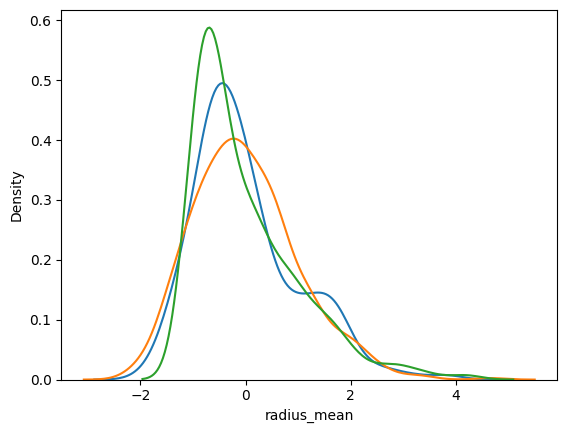

In [19]:

sns.kdeplot(scaler_df['radius_mean'])
sns.kdeplot(scaler_df['texture_mean'])
sns.kdeplot(scaler_df['concavity_mean'])

##### pairplot to depict relationship between different columns

<Figure size 1400x600 with 0 Axes>

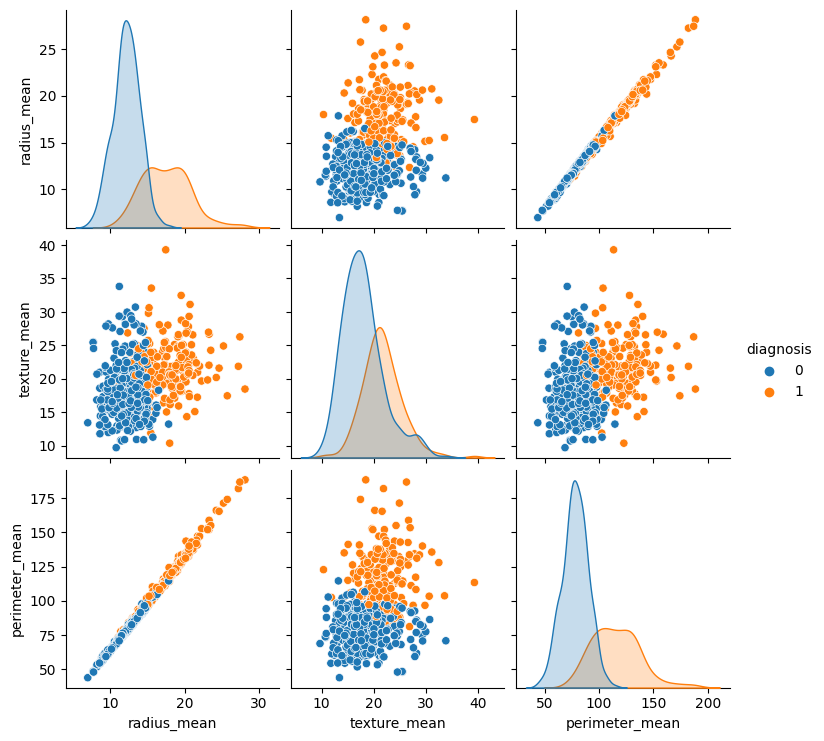

In [20]:
plt.figure(figsize=(14,6))
sns.pairplot(df.iloc[:,0:4],hue='diagnosis')

##### splitting dataset into independent variables / features (x) and dependent / target variable (y)

In [21]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [22]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int32

#### splitting our dataframe into training and testing dataframes

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [25]:
x_train[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


##### feature scaling of training and testing independent variables

In [26]:
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

#### IMPLEMENTATION OF MODELS

##### 1. LOGISTIC REGRESSION

In [27]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X=x_train,y=y_train)

LogisticRegression()

##### 2. DECISION TREE

In [28]:
#  decision tree
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(random_state=0,criterion="entropy")
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##### 3. RANDOM FOREST

In [29]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=10)
model3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

##### Comparison of the three models

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [31]:
print('Logistic Regression accuracy: ',model.score(x_test,y_test))
print('Decision Tree accuracy: ',model2.score(x_test,y_test))
print('Random Forest accuracy: ',model3.score(x_test,y_test))


Logistic Regression accuracy:  0.956140350877193
Decision Tree accuracy:  0.9385964912280702
Random Forest accuracy:  0.9736842105263158


In [32]:
y_pred1=model.predict(x_test)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test)


In [33]:
print('Logistic Regression\nClassification Report: ',classification_report(y_test,y_pred1),'\nAccuracy Score', accuracy_score(y_test,y_pred1))

Logistic Regression
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114
 
Accuracy Score 0.956140350877193


In [34]:
print('Decision Tree\nClassification Report: ',classification_report(y_test,y_pred2),'\nAccuracy Score', accuracy_score(y_test,y_pred2),'\n')

Decision Tree
Classification Report:                precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114
 
Accuracy Score 0.9385964912280702 



In [35]:
print('Random Forest\nClassification Report: ',classification_report(y_test,y_pred3),'\nAccuracy Score', accuracy_score(y_test,y_pred3),'\n')

Random Forest
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
 
Accuracy Score 0.9736842105263158 



In [36]:
y_pred3[:5], y_test[:5]

(array([1, 0, 0, 0, 0]),
 512    1
 457    0
 439    0
 298    0
 37     0
 Name: diagnosis, dtype: int32)

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)
cm3=confusion_matrix(y_test,y_pred3)

In [38]:
y_test.value_counts()

0    67
1    47
Name: diagnosis, dtype: int64

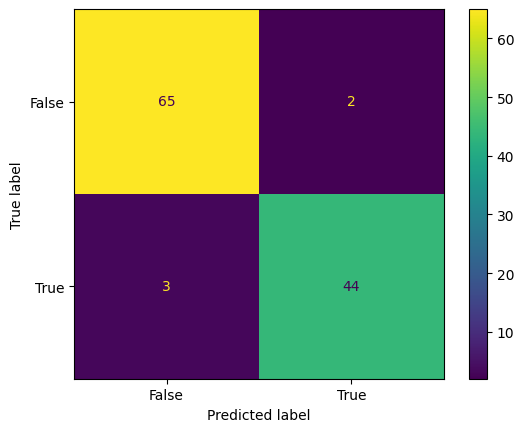

In [39]:
cm1_display=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels = [False, True])
cm1_display.plot()

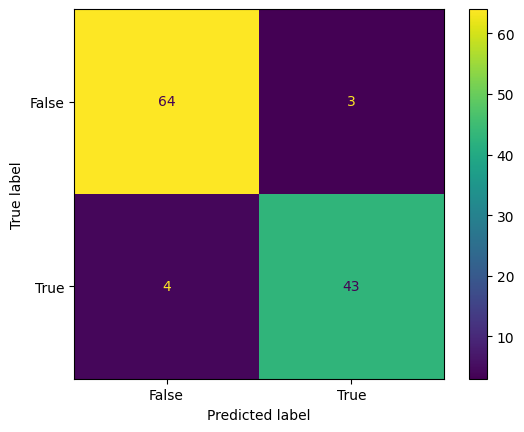

In [40]:
cm2_display=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels = [False, True])
cm2_display.plot()

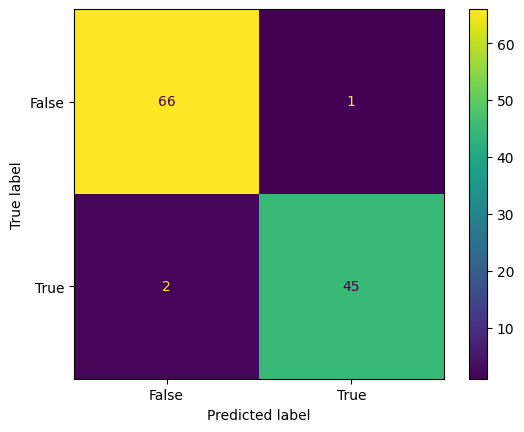

In [41]:
cm3_display=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels = [False, True])
cm3_display.plot()

[Text(0, 0, '68'), Text(0, 0, '46')]

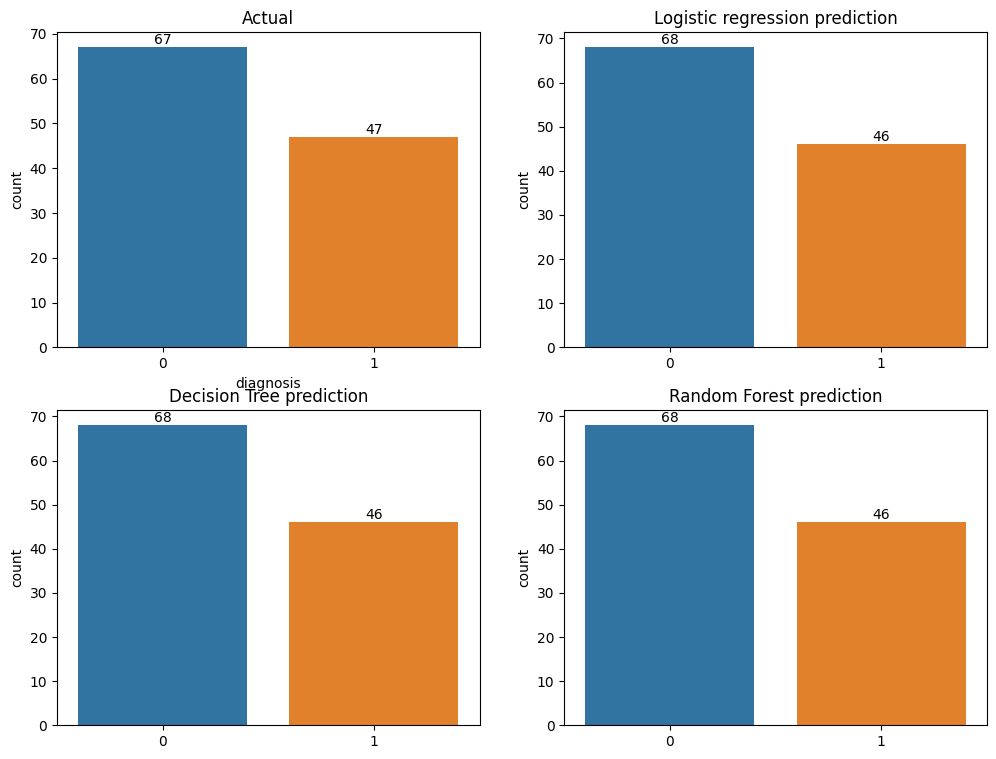

In [42]:
figure,axes=plt.subplots(2,2,figsize=(12,9))
axes[0][0].set_title('Actual')
g1=sns.countplot(x=y_test,ax=axes[0][0])
g1.bar_label(g1.containers[0])

axes[0][1].set_title('Logistic regression prediction')
g2=sns.countplot(x=y_pred1,ax=axes[0][1])
g2.bar_label(g2.containers[0])
  
axes[1][0].set_title('Decision Tree prediction')
g3=sns.countplot(x=y_pred2,ax=axes[1][0])
g3.bar_label(g3.containers[0])

axes[1][1].set_title('Random Forest prediction')
g4=sns.countplot(x=y_pred3,ax=axes[1][1])
g4.bar_label(g4.containers[0])


#### CONCLUSION: 
THE CLASSIFICATION OF MALIGNANT/ BENIGN BREAST CANCER HAS BEEN PERFORMED. ACCURACY SCORE OF RANDOM FOREST CLASSIFICATION ON THIS DATASET IS THE HEIGHEST (97.37%).